In [58]:
import pandas as pd

df = pd.read_csv("twitter_cleaned.csv")

# View sample tweets
df['tweet_text'].head(20).to_list()


['Canada faces an economic crossroads: - Unemployment rose to 6.9% - 15.4% of young men are jobless - Women (25–54) lost 60K jobs in April - 3.6K manufacturing jobs vanished - 26.8K retail jobs disappeared Canada’s future hinges on our next steps. 59 414 39K',
 "Donovan Canada's unemployment rate has now hit 7%. Why is the federal government still approving new foreign worker visas? 388 660 117K",
 'BREAKING CANADIAN YOUTH 139 696 68K UNEMPLOYMENT INCREASING FASTER THAN ANY OTHER ADVANCED NATION traditional jobs worked by',
 'Canada just posted a 7% UNEMPLOYMENT rate. Up from 6.9% in April. Continuing the manufactured DECLINE of this Country 37 94 4.5K',
 'Canadian Rate Has Now Hit 7% 2 Unemployment',
 'Dwelling Youth Canadian at Recession Levels, The Kids Are Not Alright: BMO 9 22 4.5K Unemployment Canadian Youth Unemployment at Recession Levels. The Kids Are Not Alright: BMO - Better Dwelling',
 'Canadian Rate Has Now Hit 7% 2 Unemployment',
 'Koch And yet, the Canadian youth (15-24)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [60]:
top_keywords = [
    'private sector', 'retail', 'trade', 'store', 'supermarket', 'employee', 
    'cashier', 'sales associate', 'clerk', 'shop', 'service worker', 'wholesale', 
    'frontline worker', 'retail staff', 'store manager', 'salesperson'
]


In [61]:
low_keywords = [
    'self-employed', 'freelancer', 'gig worker', 'contractor', 'public administration', 
    'government job', 'civil service', 'public sector', 'government employee', 
    'remote work', 'consultant', 'independent worker', 'govt job', 'bureaucrat'
]


In [62]:
df['tweet_text_lower'] = df['tweet_text'].str.lower()


In [63]:
from collections import defaultdict

# Initialize counters
top_counts = defaultdict(int)
low_counts = defaultdict(int)

# Loop through each keyword and count matches
for keyword in top_keywords:
    top_counts[keyword] = df['tweet_text_lower'].str.contains(keyword).sum()

for keyword in low_keywords:
    low_counts[keyword] = df['tweet_text_lower'].str.contains(keyword).sum()

# Print results
print("🔼 Top Worker Class Keywords Tweet Counts:\n")
for k, v in top_counts.items():
    print(f"{k}: {v} tweets")

print("\n🔽 Low Worker Class Keywords Tweet Counts:\n")
for k, v in low_counts.items():
    print(f"{k}: {v} tweets")


🔼 Top Worker Class Keywords Tweet Counts:

private sector: 5 tweets
retail: 9 tweets
trade: 59 tweets
store: 6 tweets
supermarket: 0 tweets
employee: 8 tweets
cashier: 0 tweets
sales associate: 0 tweets
clerk: 0 tweets
shop: 4 tweets
service worker: 0 tweets
wholesale: 1 tweets
frontline worker: 0 tweets
retail staff: 0 tweets
store manager: 0 tweets
salesperson: 0 tweets

🔽 Low Worker Class Keywords Tweet Counts:

self-employed: 0 tweets
freelancer: 0 tweets
gig worker: 0 tweets
contractor: 0 tweets
public administration: 0 tweets
government job: 1 tweets
civil service: 1 tweets
public sector: 4 tweets
government employee: 0 tweets
remote work: 0 tweets
consultant: 1 tweets
independent worker: 0 tweets
govt job: 0 tweets
bureaucrat: 2 tweets


#### As original twiteer data is more generalized i came up two more dataset which containt specific keywords like
### 1) tweets for (private sector', 'retail', 'trade', 'employee',) top_employment_workeclass
### 2) tweets for('self-employed', 'freelancer', 'gig worker', 'contractor', 'public administration') low_employment_workeclass

In [132]:
import pandas as pd
import re

# Load CSV without header
df = pd.read_csv(r"C:\Users\birva\Downloads\top.csv", header=None)

# Extract the date column (column 7)
df['Date'] = df[7]

# Concatenate all other columns into 'Tweet_Text'
tweet_cols = df.drop(columns=[7])
df['Tweet_Text'] = tweet_cols.astype(str).apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Function to clean Tweet_Text
def clean_text(text):
    text = str(text)
    text = re.sub(r'https?://\S+', '', text)      # remove http/https links
    text = re.sub(r'www\.\S+', '', text)          # remove www links
    text = re.sub(r'@\w+', '', text)              # remove @usernames
    text = re.sub(r'\bnan\b', '', text, flags=re.IGNORECASE)  # remove standalone 'nan'
    return text.strip()

# Apply cleaning
df['Tweet_Text'] = df['Tweet_Text'].apply(clean_text)

# Drop rows where Tweet_Text is empty after cleaning
df = df[df['Tweet_Text'].str.strip().astype(bool)]

# Keep only relevant columns
final_df = df[['Date', 'Tweet_Text']]

# Save the cleaned file
final_df.to_csv('top_employment_cleaned.csv', index=False)

print("✅ Saved as 'top_employment_cleaned.csv'")


✅ Saved as 'top_employment_cleaned.csv'


In [ ]:
# Load original files

df_low = pd.read_csv(r"C:\Users\birva\Downloads\x (6).csv",skiprows=[1,2,3,4,5])

In [135]:
# 2. Print actual column names to inspect

print("LOW Columns:\n", df_low.columns.tolist())

LOW Columns:
 ['css-1jxf684', 'css-1jxf684 3', 'css-146c3p1', 'css-1jxf684 4', 'css-1jxf684 5', 'css-1jxf684 href', 'css-1jxf684 6', 'css-1jxf684 7', 'css-1jxf684 8', 'css-1jxf684 14', 'css-1jxf684 href 4', 'css-1jxf684 15', 'css-9pa8cd src 2', 'css-1jxf684 16', 'css-1jxf684 17', 'css-175oi2r href 5', 'css-1jxf684 18', 'css-1jxf684 19', 'css-1jxf684 20', 'css-1jxf684 21', 'css-1jxf684 22']


In [136]:
 ## Select columns: tweet texta, date

low_selected = df_low[['css-1jxf684 4', 'css-146c3p1']].copy()

In [137]:
print(top_selected.head(5))

                                       css-1jxf684 4 css-146c3p1
0  At Web Summit 2025, dilium is showing how imme...      May 30
1  'Hardship and chaos' in BC apples.\n\nIn the M...      May 29
2                                           End of a      May 29
3  At Web Summit 2025, dilium is showing how imme...      May 30
4  'Hardship and chaos' in BC apples.\n\nIn the M...      May 29


In [138]:
print(low_selected.head(5))

                                       css-1jxf684 4 css-146c3p1
0                                               Meet      May 28
1  Big week for Eby’s NDP:\n\n1. New NDP car tax ...      May 18
2                                                NaN         NaN
3                             In this episode of the      May 29
4  Big week for Eby’s NDP:\n\n1. New NDP car tax ...      May 18


In [139]:
# Rename columns
top_selected.columns = ['tweet_text', 'date_posted']
low_selected.columns = ['tweet_text', 'date_posted']

In [140]:
 #Drop empty tweet rows
top_selected.dropna(subset=['tweet_text'], inplace=True)
low_selected.dropna(subset=['tweet_text'], inplace=True)

In [141]:
# Save to cleaned files
top_selected.to_csv("top_employment_cleaned.csv", index=False)
low_selected.to_csv("low_employment_cleaned.csv", index=False)

In [142]:


# Load the cleaned CSVs 
top_df = pd.read_csv("top_employment_cleaned.csv")
low_df = pd.read_csv("low_employment_cleaned.csv")

# Summary for Top Employment
print("🔹 Top Employment CSV")
print("Rows:", len(top_df))
print("Duplicate rows:", top_df.duplicated().sum())
print("Null values:\n", top_df.isnull().sum())

# Summary for Low Employment
print("\n🔹 Low Employment CSV")
print("Rows:", len(low_df))
print("Duplicate rows:", low_df.duplicated().sum())
print("Null values:\n", low_df.isnull().sum())


🔹 Top Employment CSV
Rows: 171
Duplicate rows: 16
Null values:
 tweet_text     0
date_posted    0
dtype: int64

🔹 Low Employment CSV
Rows: 165
Duplicate rows: 19
Null values:
 tweet_text     0
date_posted    0
dtype: int64


In [143]:
top_df['date_posted'].fillna(method='ffill', inplace=True)
low_df['date_posted'].fillna(method='ffill', inplace=True)


C:\Users\birva\AppData\Local\Temp\ipykernel_14152\3463100678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top_df['date_posted'].fillna(method='ffill', inplace=True)
C:\Users\birva\AppData\Local\Temp\ipykernel_14152\3463100678.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  top_df['date_posted'].fillna(method='ffill', inplace=True)
C:\Users\birva\AppData\Local\Temp\ipykernel_14152\3463100678.py:2: FutureWarning: A value is trying

In [144]:
# Drop duplicate rows
top_df.drop_duplicates(inplace=True)
low_df.drop_duplicates(inplace=True)


In [72]:
# Function to print summary
def print_clean_summary(name, df):
    print(f"🔹 {name}")
    print("Rows:", len(df))
    print("Columns:", list(df.columns))
    print("Duplicate rows:", df.duplicated().sum())
    print("Null values:\n", df.isnull().sum())
    print("-" * 40)

# Print for both datasets
print_clean_summary("Top Employment Final", top_df)
print_clean_summary("Low Employment Final", low_df)

🔹 Top Employment Final
Rows: 149
Columns: ['tweet_text', 'date_posted']
Duplicate rows: 0
Null values:
 tweet_text     0
date_posted    4
dtype: int64
----------------------------------------
🔹 Low Employment Final
Rows: 149
Columns: ['tweet_text', 'date_posted']
Duplicate rows: 0
Null values:
 tweet_text     0
date_posted    4
dtype: int64
----------------------------------------


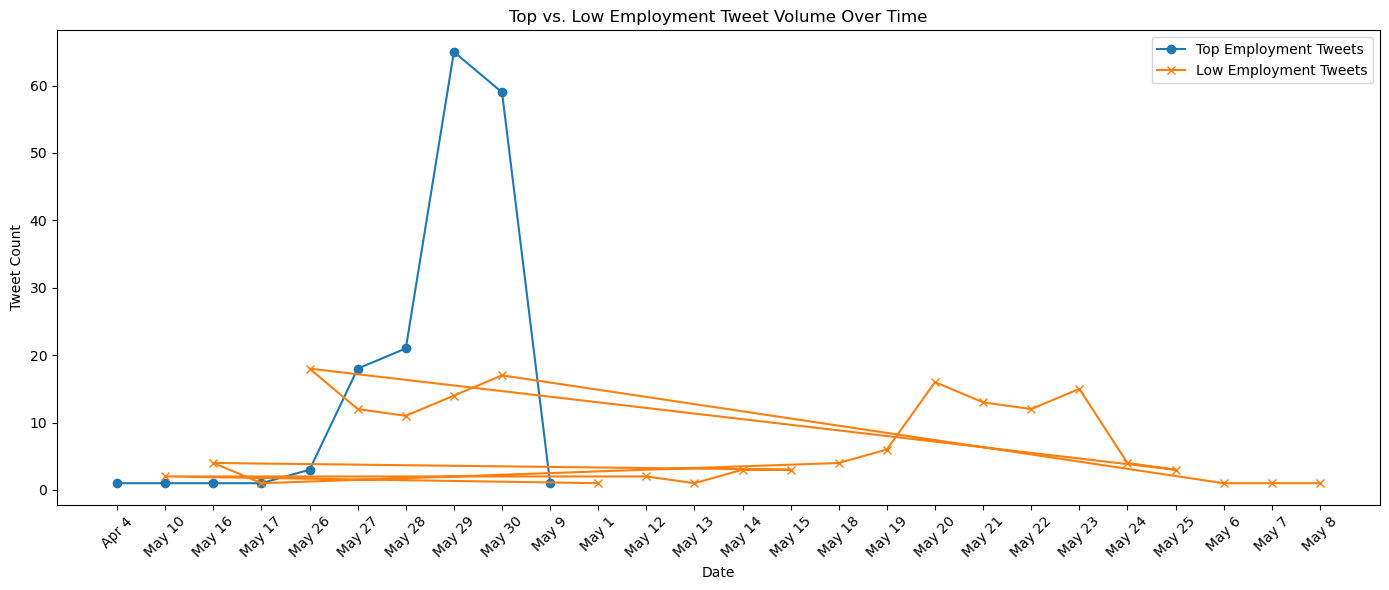

In [145]:

# Load the cleaned datasets
top_df = pd.read_csv('top_employment_cleaned.csv')
low_df = pd.read_csv('low_employment_cleaned.csv')

# Count tweets per date
top_counts = top_df['date_posted'].value_counts().sort_index()
low_counts = low_df['date_posted'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14,6))
plt.plot(top_counts.index, top_counts.values, label='Top Employment Tweets', marker='o')
plt.plot(low_counts.index, low_counts.values, label='Low Employment Tweets', marker='x')
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Top vs. Low Employment Tweet Volume Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\birva\AppData\Local\Temp\ipykernel_14152\187629486.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\birva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


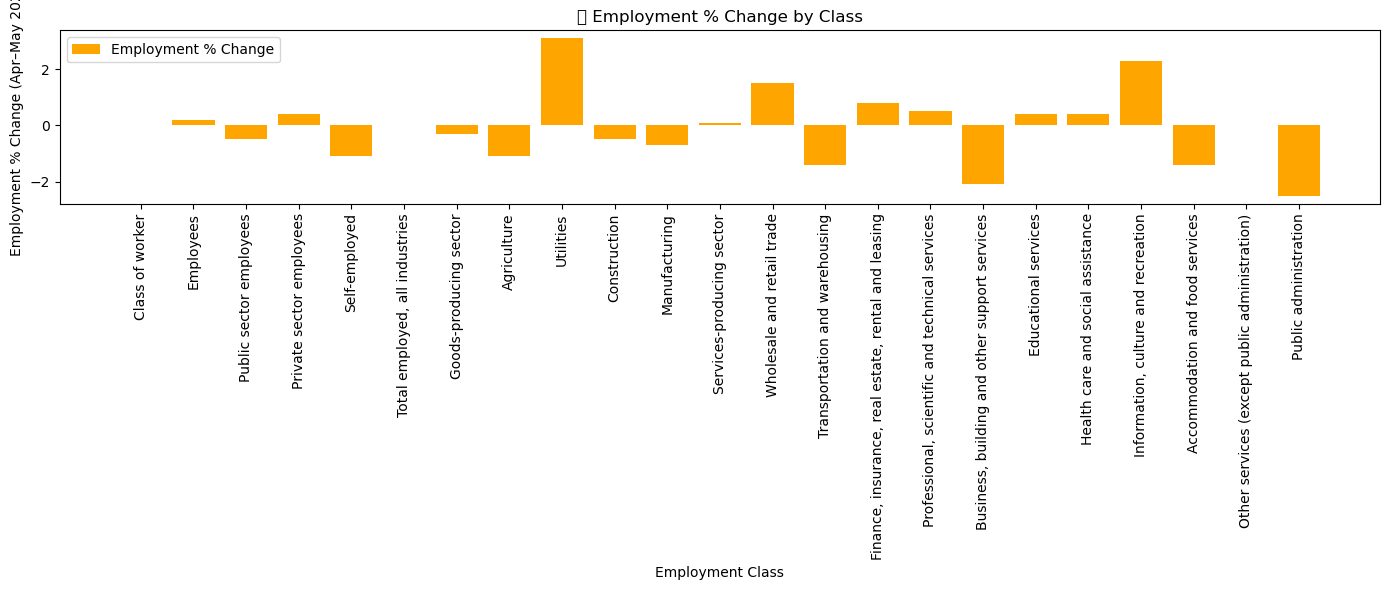

In [146]:

employment_df = pd.read_csv("employment_cleaned.csv")
tweet_counts = pd.read_csv("top_employment_cleaned.csv").shape[0] + pd.read_csv("low_employment_cleaned.csv").shape[0]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(employment_df['class_of_worker'], employment_df['pct_change_apr_may_2025'], label="Employment % Change", color='orange')
plt.xticks(rotation=90)
plt.xlabel("Employment Class")
plt.ylabel("Employment % Change (Apr–May 2025)")
plt.title("📊 Employment % Change by Class")
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\birva\AppData\Local\Temp\ipykernel_14152\881481921.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()


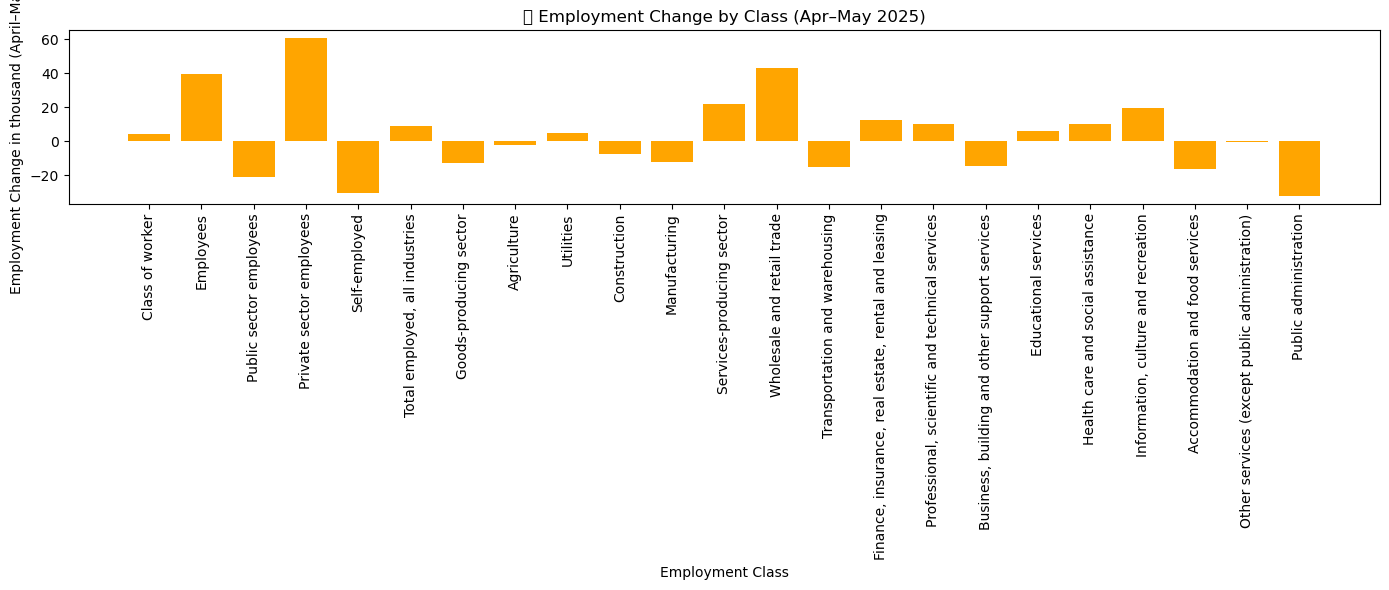

In [147]:
class_names = employment_df['class_of_worker']
employment_change = employment_df['change_apr_may_2025']

# Plot
plt.figure(figsize=(14, 6))
plt.bar(class_names, employment_change, color='orange')
plt.xticks(rotation=90)
plt.xlabel("Employment Class")
plt.ylabel("Employment Change in thousand (April–May 2025)")
plt.title("📊 Employment Change by Class (Apr–May 2025)")
plt.tight_layout()
plt.show()